# Predicting house prices using decision tree model

**by Greg, Leon and Jonny**, February 2021

> "The best time to plant a tree was 20 years ago, the second best time is now."

\- Ja Rule.

## Loading packages and importing data

In [138]:
import pandas as pd
import sklearn
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.__version__
sklearn.__version__
np.__version__

'1.19.2'

In [51]:
train = pd.read_csv("train.csv")
train.head(200)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Basic data exploration

Firstly, we will explore the sales price which is our target variable. Then, we select a few variables which we think will have the most impact on the sales price using only our intuition. We will visualize the relationship between these variables and the sales price using various graphs such as boxplots and scatterplots.  

In summary:
- General overview of the train dataset.
- Basic exploration of the sales price.
- Basic exploration of a few variables and their relationship with the sales price. 

In [52]:
train.columns
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [54]:
# Standardize column values. First, convert into str format then strip and capitalize first letter. 
train.columns = train.columns.astype("str")
# train.columns = train.columns.str.strip().str.title()
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [115]:
# NULL VALUES

# raw_train.isnull().sum(axis = 0) # Sum of rows with NaN values for each column.
# mf = raw_train.MiscFeature.notnull() # Returns Boolean values for NaN values for the column MiscFeature. 
# raw_train[mf] # Returns rows which have values in the MiscFeature column. 

In [166]:
# Summary statistics of our target variable SalePrice.
train['SalePrice'].describe()

# Just at a glance, there are no glaring problems with the summary statistics of our target variable. e.g. Minimum below 1

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\Leon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

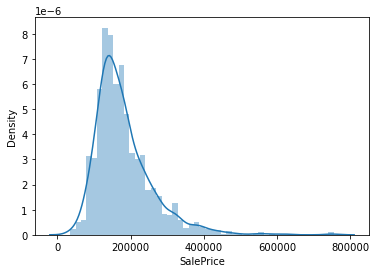

In [167]:
# Sales price distribution
x = train['SalePrice']

sns.distplot(x)
# sns.distplot(train['SalePrice'], hist = False)



C:\Users\Leon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Leon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Leon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

Text(0.5, 1.0, 'Log Normal distribution curve')

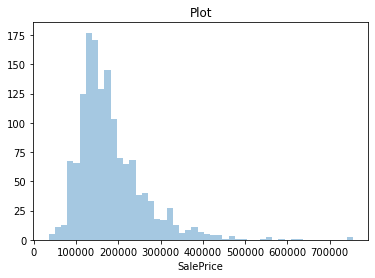

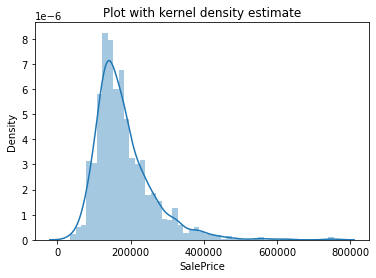

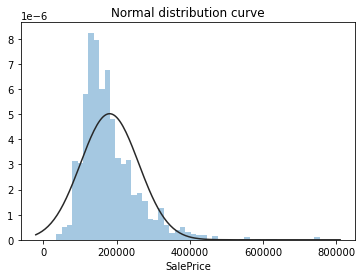

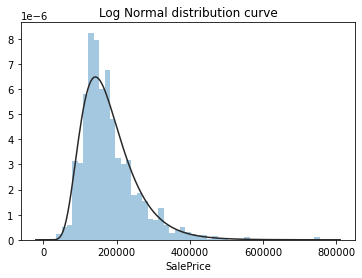

In [173]:
x = train['SalePrice']

plt.figure(1)
sns.distplot(x, kde = False)
plt.title('Plot')

plt.figure(2)
sns.distplot(x)
plt.title('Plot with kernel density estimate')

plt.figure(3)
sns.distplot(x, kde = False, fit = stats.norm)
plt.title('Normal distribution curve')

plt.figure(4)
sns.distplot(x, kde = False, fit = stats.lognorm)
plt.title('Log Normal distribution curve')


From the plots above, it is clear that the distribution is not symmetrical and is therefore not Gaussian (normal). The data is right-skewed, signified by the longer right tail, this means that most of the data is concentrated on the left.

The lognormal distribution more accurately describes our dataset in comparison to the normal distribution.

The normality of the feature variables do no affect the result of the decision tree model, however, sale price is our target variable. There exists some houses with more extreme prices on the right which could have significant influence on the RMSE. In order to minimize the RMSE and improve predictions, a transformation of the sale price to a normal distribution could be beneficial. 

In [189]:
log_x = np.log(x)

C:\Users\Leon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice'>

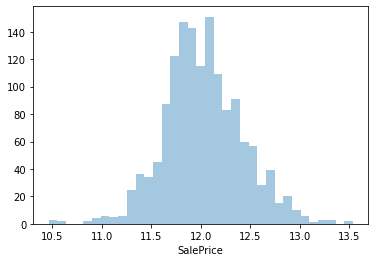

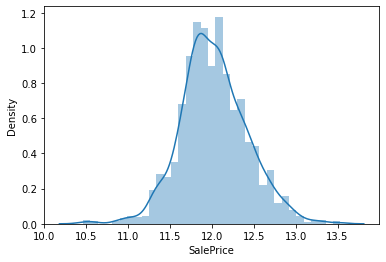

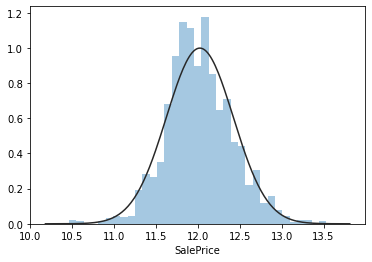

In [191]:
plt.figure(1)
sns.distplot(log_x, kde = False)

plt.figure(2)
sns.distplot(log_x, kde = True)

plt.figure(3)
sns.distplot(log_x, kde = False, fit = stats.norm)

Although the log normal transformation is not perfect, the fit is drastically improved compared to pre-transformation. 

In the next step, we will perform a brief exploration on a couple of the feature variables and determine it's relationship with the sale price.

Let's start off with the variable 'OverallQual'. The methods in which it is calculated is unknown, it could be a subjective rating by the observer or it could be calculated using more objective variables. However, the expectation is that the overall quality will have a positive correlation with the sale price. 

<function matplotlib.pyplot.show(close=None, block=None)>

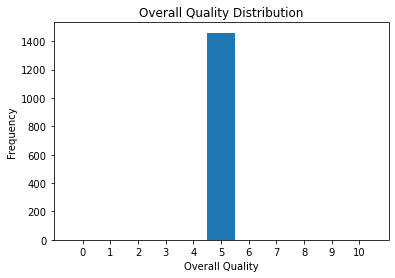

In [175]:
# Overall quality of the house. This should have a positive correlation with the sales price of the house. However, the method used for 
# calculating the overall quality value is unknown. The value could be calculated via subjective methods or it could be composed of 
# values of objective variables such as year, garage size etc. 

# First. we observe the distribution of the overall quality values using a histogram. 
plt.hist(train["OverallQual"], bins = np.arange(12)-0.5)
plt.xticks(range(11))
plt.xlabel('Overall Quality')
plt.ylabel('Frequency')
plt.title('Overall Quality Distribution')
plt.show

# Key findings:
# Overall quality does not follow a normal distribution. 
# Vast majority of the houses are given an overall quality score of between 5 and 8. 



(array([  2.,   2.,  10.,  24.,  94., 107., 118., 127., 119., 126., 145.,
        126., 123.,  65.,  70.,  49.,  29.,  32.,  21.,  16.,  19.,  10.,
          6.,   2.,   4.,   4.,   1.,   3.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.]),
 array([ 334.        ,  446.93617021,  559.87234043,  672.80851064,
         785.74468085,  898.68085106, 1011.61702128, 1124.55319149,
        1237.4893617 , 1350.42553191, 1463.36170213, 1576.29787234,
        1689.23404255, 1802.17021277, 1915.10638298, 2028.04255319,
        2140.9787234 , 2253.91489362, 2366.85106383, 2479.78723404,
        2592.72340426, 2705.65957447, 2818.59574468, 2931.53191489,
        3044.46808511, 3157.40425532, 3270.34042553, 3383.27659574,
        3496.21276596, 3609.14893617, 3722.08510638, 3835.0212766 ,
        3947.95744681, 4060.89361702, 4173.82978723, 4286.76595745,
        4399.70212766, 4512.63829787, 4625.57446809, 4738.510638

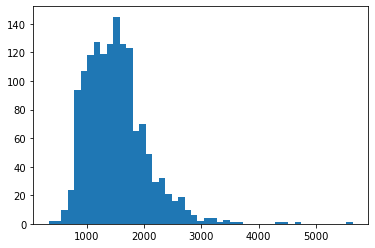

In [104]:
plt.hist(train["GrLivArea"], bins = 'auto')
plt.xlabel('Ground Living Area')
plt.ylabel('Frequency')
plt.title('Overall Quality Distribution')
# plt.xticks(range(11))
# plt.show

In [114]:
oq_5 = [train["OverallQual"] = 5]
train[oq_5]



SyntaxError: invalid syntax (<ipython-input-114-bb250e03aa4d>, line 1)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
shape, loc, scale = stats.lognorm.fit(x, loc=0)
pdf_lognorm = stats.lognorm.pdf(x, shape, loc, scale)

ax1.hist(x, bins='auto', density=True)
ax1.plot(x, pdf_lognorm)
ax1.set_ylabel('probability')
ax1.set_title('Linear Scale')

ax2.hist(x, bins='auto', density=True)
ax2.plot(x, pdf_lognorm)
ax2.set_xscale('log')
ax2.set_title('Log Scale');

In [113]:
del oq_5